In [1]:
# t-SNE on Tf-Idf, we are going to use the brown corpus instead of wikipedia because it is smaller

In [2]:
%matplotlib notebook
import pdb
import numpy as np
import nltk
import json
import sklearn
from sklearn.manifold import TSNE
from datetime import datetime
from matplotlib import pyplot as plt
from nltk.corpus import brown
from brown_preprocessing import brown_to_idx
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
vocab_size = 2000
keep_words = set([
  'king', 'man', 'queen', 'woman',
  'italy', 'rome', 'france', 'paris',
  'london', 'britain', 'england',
])
indexed_sents, word2idx_lim_vocab, idx2word_lim_vocab = brown_to_idx(vocab_size=vocab_size,keep_words=keep_words)
sents = list(brown.sents())

number of sentences 57340
2003


In [5]:
V = len(idx2word_lim_vocab)
print V
print len(word2idx_lim_vocab.keys())
print idx2word_lim_vocab[-10:]
sents = brown.sents()
print sents[0]



2004
2004
[u'hanover', u't', u'bottle', u'dictionary', u'shook', u"he'd", u'poems', u"she'd", u'-', u'anode']
[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.']


In [6]:
# convert to tf-idf
# tf-idf takes in a matrix of size VxN, where V is the vocabulary size and N is the number of sentences
V = len(idx2word_lim_vocab)
N = len(indexed_sents)
print V,N
term_doc_matrix = np.zeros((V,N)) # will contain the counts of each word in each document
for i_s in indexed_sents:
    for wix in i_s:
        term_doc_matrix[i_s,wix] += 1. 
tfidf_transformer = TfidfTransformer()
A = tfidf_transformer.fit_transform(term_doc_matrix)
A = A.toarray()

2004 57340


<IPython.core.display.Javascript object>


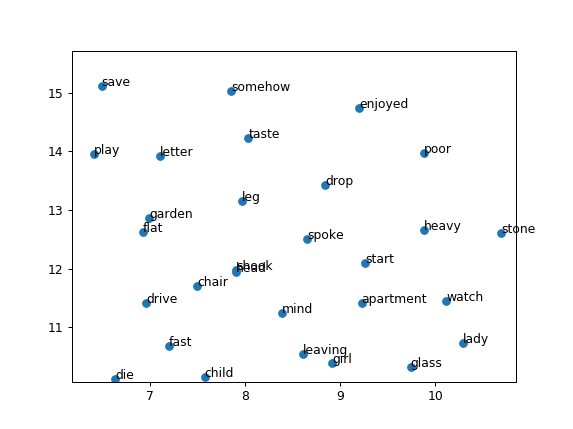

In [11]:
# tSNE
tsne = TSNE()
Z = tsne.fit_transform(A)

plt.scatter(Z[:,0],Z[:,1])
for idx in range(V):
    try: # try except if the utf8 encoding fails
        plt.annotate(idx2word_lim_vocab[idx].encode('utf8'),xy=(Z[idx,0],Z[idx,1]))
    except:
        print 'bad string'
    
plt.show()

In [26]:
# have to code the finda analogies bit
def find_analogies(king,man,woman,We,word2idx):
    # analogy form is king - man + woman
    # We is the word embedding
    king_We = We[word2idx[king],:]
    man_We = We[word2idx[man],:]
    woman_We = We[word2idx[woman],:]
    
    v0 = king_We - man_We + woman_We
    
    def l2_dist(a,b):
        return np.sum((a-b) ** 2)
    
    def cosine_dist(a,b):
        cosine_ab = a.dot(b)/ (np.linalg.norm(a)*np.linalg.norm(b))
        cosine_dist = 1-cosine_ab
        return cosine_dist
    
    for dist_fn,name  in ((l2_dist,'euclidean'),(cosine_dist,'cosine')):
        min_dist = np.inf
        closest_word = 'UNKNOWN'
        for w,idx in word2idx.iteritems():
            v0_w_dist = dist_fn(v0,We[idx,:])
            if  v0_w_dist < min_dist:
                min_dist = v0_w_dist
                closest_word = w
        print name,': %s:%s :: %s:%s'%(king,man,closest_word,woman)
        
    

In [29]:
print [w in word2idx_lim_vocab for w in keep_words]
We = Z
find_analogies('king', 'man', 'woman', We, word2idx_lim_vocab)
find_analogies('france', 'paris', 'london', We, word2idx_lim_vocab)
find_analogies('france', 'paris', 'rome', We, word2idx_lim_vocab)
find_analogies('paris', 'france', 'italy', We, word2idx_lim_vocab)


[True, True, True, True, True, True, True, True, True, True, True]
euclidean : king:man :: king:woman
cosine : king:man :: liberal:woman
euclidean : france:paris :: east:london
cosine : france:paris :: top:london
euclidean : france:paris :: each:rome
cosine : france:paris :: mission:rome
euclidean : paris:france :: moving:italy
cosine : paris:france :: besides:italy
